#***☎️TELCO CUSTOMER CHURN PREDICTION:***

##**📥 MODULE IMPORTATION:**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##**📂 FILE IMPORTATION:**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tech Crush DATASETS/Capstone Consideration/Telco-Customer-Churn.csv')

##**🔎 DATA PREVIEW:**

In [ ]:
print("DATA PREVIEW: ")

print("\n\nFIRST FEW ROWS\n")
print(df.head())

print("\n\nNUMBER OF ROWS AND COLUMNS\n")
print(df.shape)

print("\n\nDATAFRAME INFORMATION\n")
print(df.info())

print("\n\nSUMMARY STATISTICS\n")
print(df.describe())

print("\n\nMISSING VALUES\n")
print(df.isnull().sum())

DATA PREVIEW: 


FIRST FEW ROWS

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0    

##**🧹 Data Cleaning and Manipulation:**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Checking the null values in the TotalCharges column

print("\n\nNULL VALUES IN TOTALCHARGES COLUMN\n")
df[df['TotalCharges'].isnull()]



NULL VALUES IN TOTALCHARGES COLUMN



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Filling the null values with 0 after findings

df['TotalCharges'].fillna(0, inplace=True)

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
print("MISSING VALUES\n")
print(df.isnull().sum())

print("\n\nDUPLICATED VALUES\n")
print(df.duplicated().sum())

print("\n\nDATAFRAME INFORMATION\n")
print(df.info())

MISSING VALUES

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


DUPLICATED VALUES

0


DATAFRAME INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            70

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **📈 Exploratory Data Analysis:**

📈 ***Churn Rate by Contract Type:***

In [ ]:
df_contract_churn = df.groupby('Contract')['Churn'].value_counts()
df_contract_churn

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64

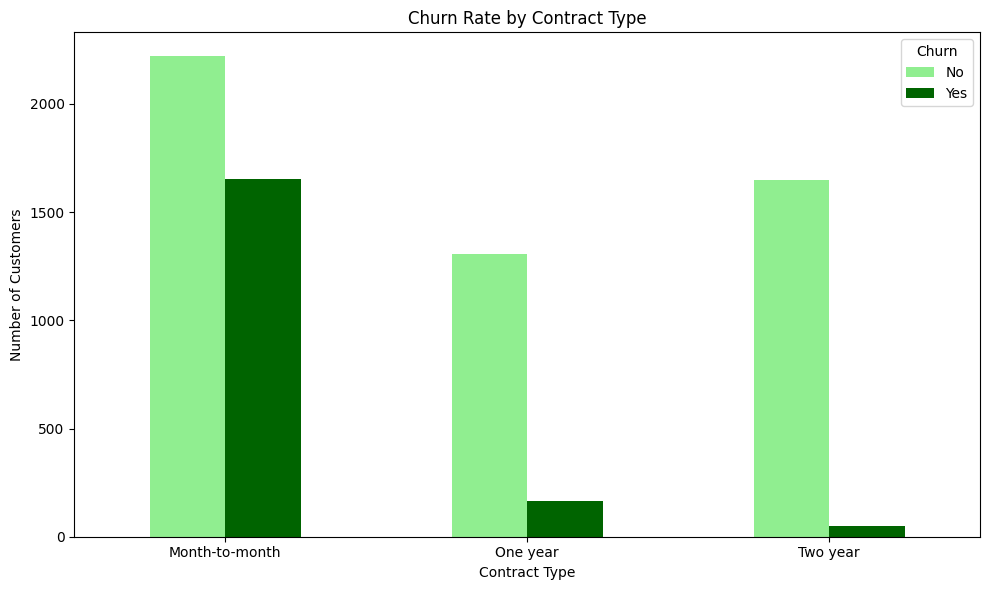

In [ ]:
#CHURN RATE BY CONTRACT TYPE
colors = ['lightgreen', 'darkgreen']
df_contract_churn.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

📈 ***Churn Rate by Services Offered:***

**Phone Service:**

In [ ]:
phone_service_churn = df.groupby('PhoneService')['Churn'].value_counts()
phone_service_churn

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: count, dtype: int64

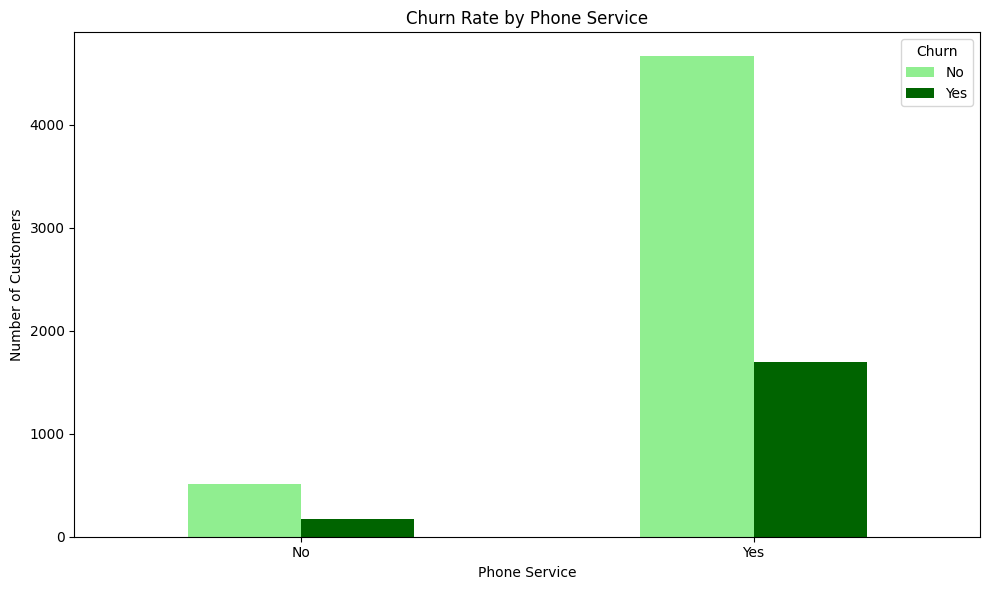

In [ ]:
# PHONE SERVICE CHURN
colors = ['lightgreen', 'darkgreen']
phone_service_churn.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Churn Rate by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [ ]:
internet_service_churn = df.groupby('InternetService')['Churn'].value_counts()
internet_service_churn

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: count, dtype: int64

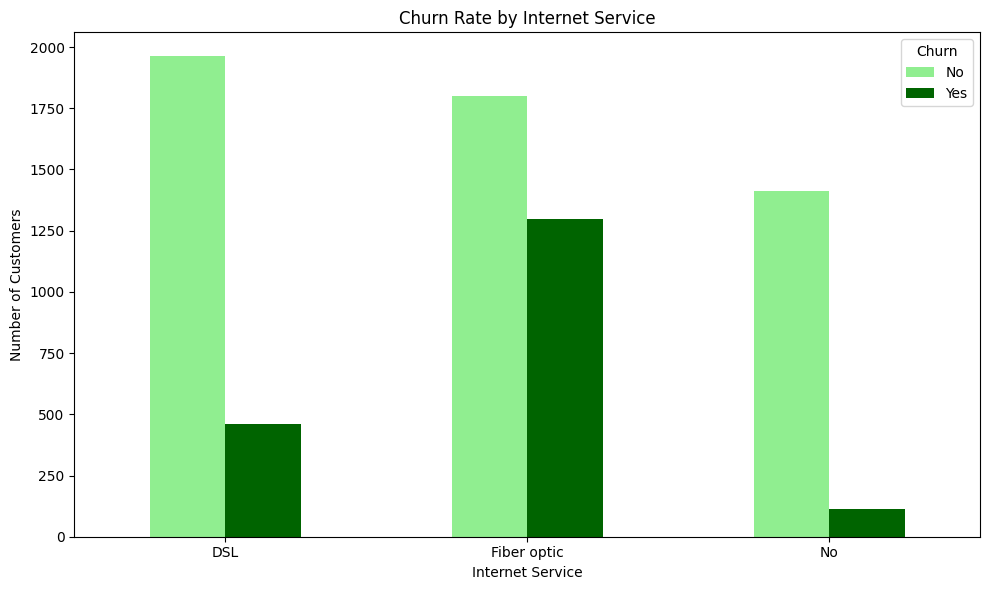

In [ ]:
# INTERNET SERVICE CHURN
colors = ['lightgreen', 'darkgreen']
internet_service_churn.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

📈 ***Churn Rate by Tenure:***

In [ ]:
# Finding out the lowest and highest tenure values
df['tenure'].min(), df['tenure'].max()

(0, 72)

In [ ]:
# Designating the tenure values into groups
bins = [0, 10, 20, 40, 50, 72]
labels = ['1-10 months', '11-20 months', '21-40 months', '41-50 months', '51-72 months']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Getting the count of each tenure group
tenure_group_churn = df.groupby('tenure_group')['Churn'].value_counts().to_frame('Count')
tenure_group_churn

Count
tenure_group Churn       
1-10 months  No       991
             Yes      968
11-20 months No       625
             Yes      283
21-40 months No      1093
             Yes      315
41-50 months No       537
             Yes      115
51-72 months No      1917
             Yes      188

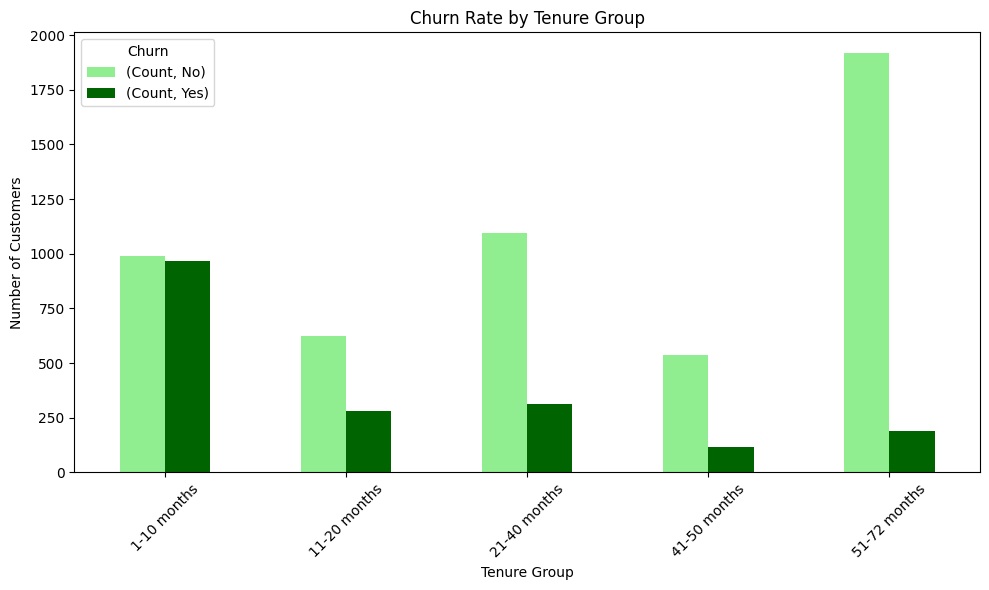

In [ ]:
# CHURN RATE BY TENURE
colors = ['lightgreen', 'darkgreen']
tenure_group_churn.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), color = colors)
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

📈 ***Churn Rate by Charges***

**Monthly Charges:**

In [ ]:
# Finding the lowest and highest MonthlyCharges values
df['MonthlyCharges'].min(), df['MonthlyCharges'].max()

(18.25, 118.75)

In [ ]:
# CHURN RATE BY MONTHLY CHARGES

# Putting MonthlyCharges into specified groups
bins = [18.25, 35, 50, 70, 85, 118.75]
labels = ['18-35', '36-50', '51-70', '71-85', '86-120']
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=True)

# Grouping Monthly Charges by Churn
monthly_charges_churn = df.groupby('MonthlyCharges_group')['Churn'].value_counts().to_frame('Count')
monthly_charges_churn

Count
MonthlyCharges_group Churn       
18-35                No      1545
                     Yes      189
36-50                No       392
                     Yes      172
51-70                No       920
                     Yes      241
71-85                No       868
                     Yes      527
86-120               No      1448
                     Yes      740

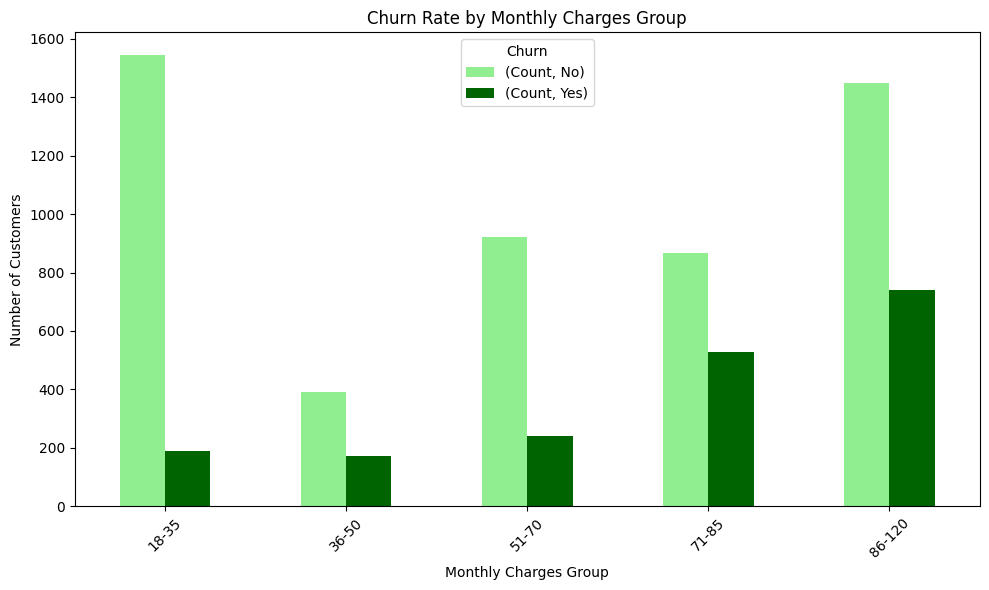

In [ ]:
# CHURN RATE BY MONTHLY CHARGES
colors = ['lightgreen', 'darkgreen']
monthly_charges_churn.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Churn Rate by Monthly Charges Group')
plt.xlabel('Monthly Charges Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [ ]:
# Finding the lowest and highest TotalCharges values
df['TotalCharges'].min(), df['TotalCharges'].max()

(0.0, 8684.8)

**Total Charges:**

In [ ]:
# CHURN RATE BY TOTAL CHARGES

# Putting TotalCharges into specified groups
bins = [0, 1000, 3000, 6000, 9000]
labels = ['0-1000', '1001-3000', '3001-6000', '6001-9000']
df['TotalCharges_group'] = pd.cut(df['TotalCharges'], bins=bins, labels=labels, right=True)

# Group Total Charges by Churn
total_charges_churn = df.groupby('TotalCharges_group')['Churn'].value_counts().to_frame('Count')
total_charges_churn

Count
TotalCharges_group Churn       
0-1000             No      1823
                   Yes     1070
1001-3000          No      1486
                   Yes      449
3001-6000          No      1250
                   Yes      262
6001-9000          No       604
                   Yes       88

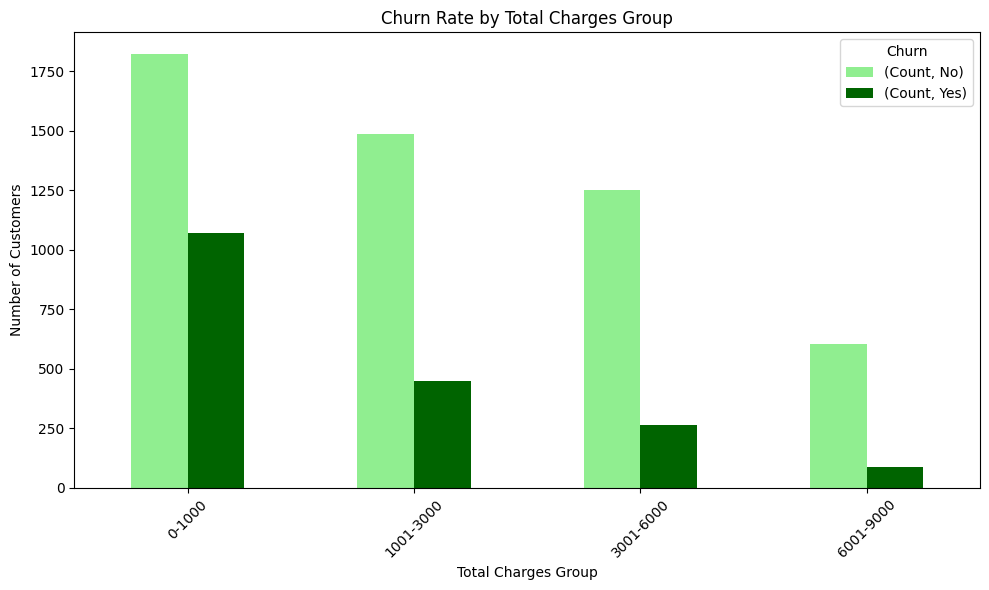

In [ ]:
# CHURN RATE BY TOTAL CHARGES
colors = ['lightgreen', 'darkgreen']
total_charges_churn.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Churn Rate by Total Charges Group')
plt.xlabel('Total Charges Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

📈 ***Churn Rate by Payment Method***

In [ ]:
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts()
payment_churn

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: count, dtype: int64

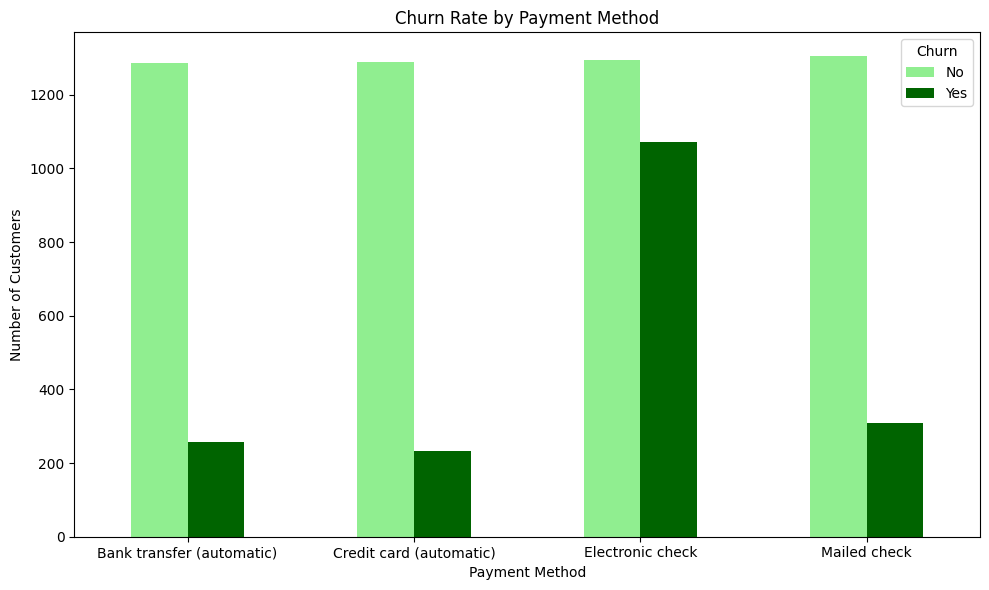

In [ ]:
# PAYMENT METHOD CHURN
colors = ['lightgreen', 'darkgreen']
payment_churn.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

##**🤖 MODEL BUILDING:**

##**🔑 Feature Encoding:**

In [ ]:
df['customerID'].value_counts()

,count
customerID,
3186-AJIEK,1
7590-VHVEG,1
5575-GNVDE,1
8775-CEBBJ,1
2823-LKABH,1
...,...
6713-OKOMC,1
1452-KIOVK,1
9305-CDSKC,1


In [ ]:
x = df.drop(columns=['customerID', 'tenure_group', 'MonthlyCharges_group', 'Churn'])

y = df['Churn']

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
cat_columns = x.select_dtypes(include='object').columns.tolist()

cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
y = y.replace({'Yes': 1, 'No': 0})
y.value_counts()

,count
Churn,
0,5174
1,1869


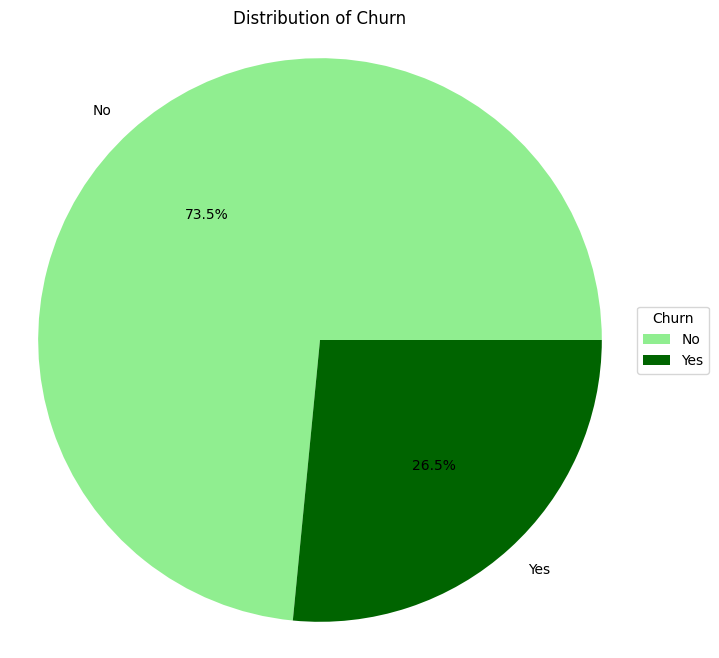

In [ ]:
# Pie chart for Churn
churn_counts = y.value_counts()
labels = ['No', 'Yes']
colors = ['lightgreen', 'darkgreen']

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Churn')
plt.legend(labels, title="Churn", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

In [ ]:
le = LabelEncoder()

for col in cat_columns:
    x[col] = le.fit_transform(x[col])

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


##**🔁 Correlation Check 🔎**

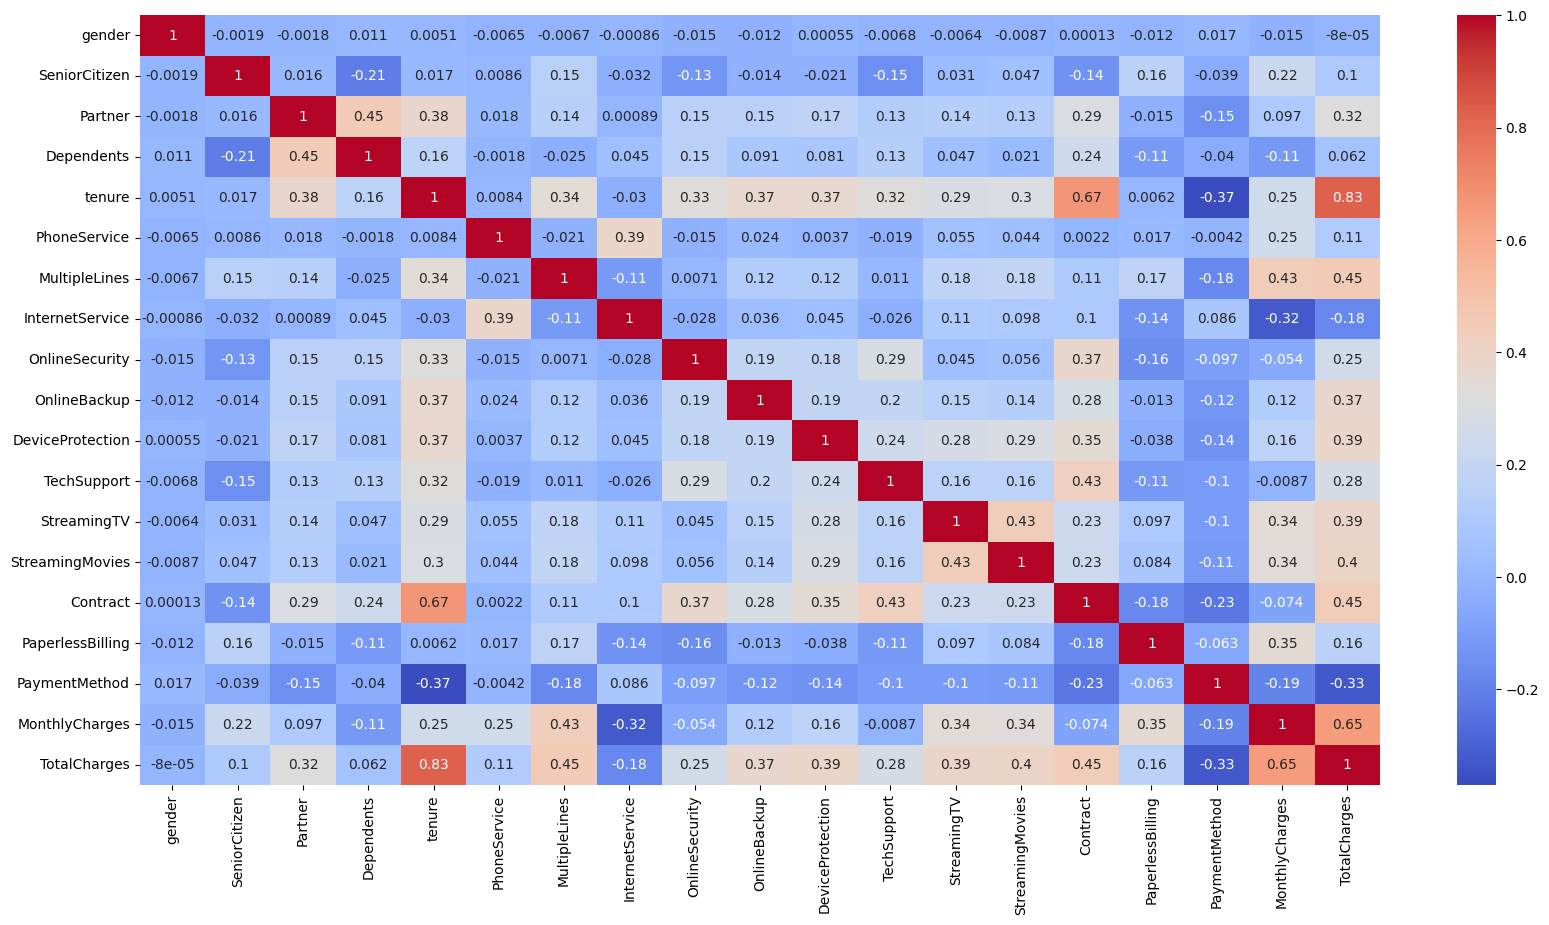

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.show()

##**⚖️ Feature Scaling:**

In [ ]:
scaler = StandardScaler()
scaledx = scaler.fit_transform(x)

In [ ]:
scaledx

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99261052],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17216471],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.9580659 ],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85293201],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87051315],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.01389665]])

##**✂️ train-test split:**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaledx, y, test_size=0.2, random_state=42)

##**🧠 Model Training:**

In [ ]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

##**🔮 Model Prediction:**

In [ ]:
y_pred_rf = rf.predict(x_test)

##**🏆 Model Evaluation:**

In [ ]:
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Decision Tree Classifier Performance:
Accuracy: 0.7991483321504613
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[949  87]
 [196 177]]


##**♻️ Cross Validation:**

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(rf, scaledx, y, cv=kf, scoring='roc_auc')

auc_scores

array([0.83976207, 0.82319874, 0.84050867, 0.80621026, 0.81865374])

##**📊 Feature Importance:**

In [ ]:
importances = rf.feature_importances_

importances

array([0.02743281, 0.02080757, 0.02386404, 0.0205457 , 0.15720959,
       0.00514402, 0.02320978, 0.02654351, 0.04798744, 0.02748876,
       0.02212142, 0.03891995, 0.01722062, 0.01834036, 0.07963341,
       0.02613736, 0.05124045, 0.17813137, 0.18802184])

In [ ]:
features = x.columns

features

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
f_importance = pd.DataFrame({'Feature':features, 'Importance':importances})

f_importance.sort_values(by='Importance', ascending=False, inplace=True)

f_importance

,Feature,Importance
18,TotalCharges,0.188022
17,MonthlyCharges,0.178131
4,tenure,0.157210
14,Contract,0.079633
16,PaymentMethod,0.051240
8,OnlineSecurity,0.047987
11,TechSupport,0.038920
9,OnlineBackup,0.027489
0,gender,0.027433
7,InternetService,0.026544


##**☎️ Features Responsible for Churn**:

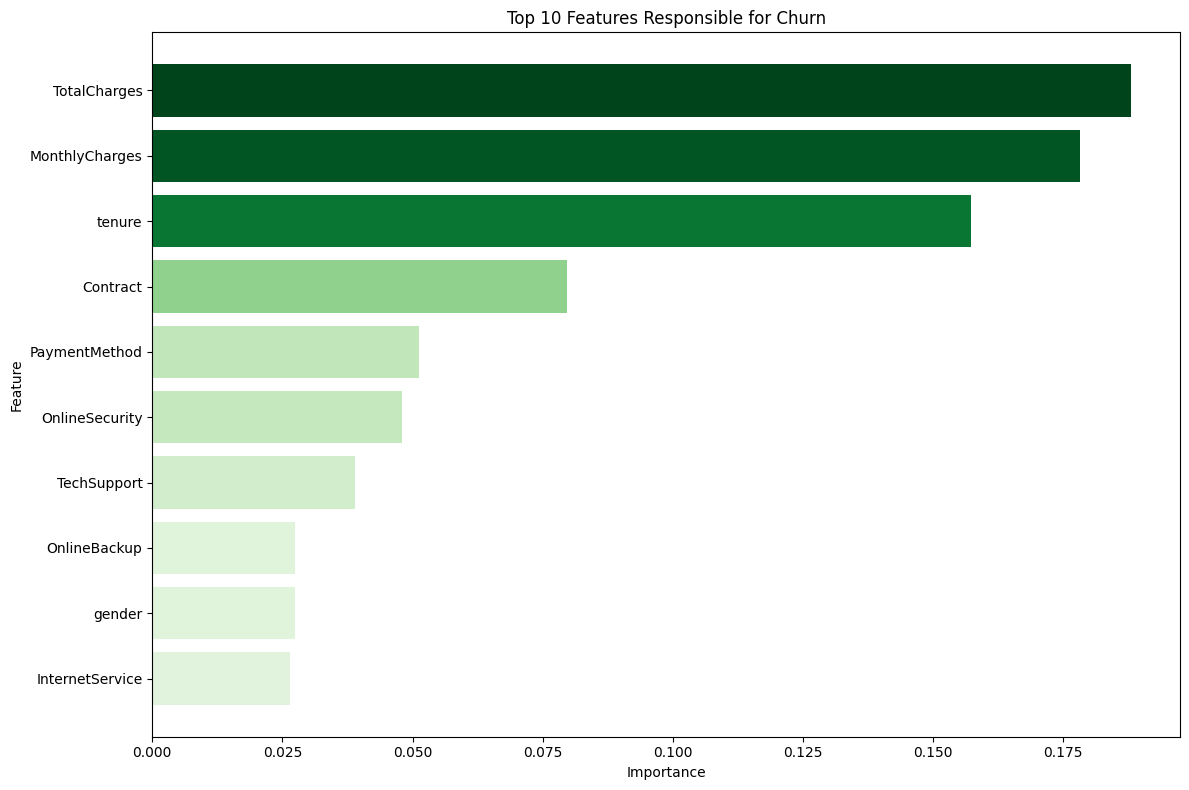

In [ ]:
#FEATURES FOR CHURN

# Sorting the feature importances in descending order
f_importance_sorted = f_importance.sort_values(by='Importance', ascending=False)

# Selecting the top 10 features
top_10_features = f_importance_sorted.head(10)

# Creating a color map from darkgreen to lightgreen
colors = plt.cm.Greens(top_10_features['Importance'] / top_10_features['Importance'].max())

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Responsible for Churn')
plt.gca().invert_yaxis() # To show the most important feature at the top
plt.tight_layout()
plt.show()

##💡**Findings and Recommendations:**

Based on this analysis, here are some recommendations to reduce customer churn:

**🎯 $Target$ $Retention$ $Efforts$:**

- *Focus on customers with high TotalCharges, shorter tenure, and higher MonthlyCharges.* These customers are statistically more likely to churn. Offer them personalized incentives, loyalty programs, or special offers to retain them.
- *Prioritize customers with specific contract types, internet services, and payment methods.* Customers with month-to-month contracts have a higher churn rate. Tailor retention strategies accordingly.
- *Address issues related to OnlineSecurity, TechSupport, OnlineBackup, and DeviceProtection.* Customers who do not use these services, or perhaps experience issues with them, are more prone to churn. Ensure these services are reliable, easy to use, and that customers understand their value.
- *Improve Early Customer Experience*: New customers with low tenure are more likely to churn. Implement a 30–60-day onboarding program with check-in calls, welcome emails, and proactive support.
- *Encourage Long-Term Contracts*: Month-to-month users have higher churn. Offer discounts or incentives for upgrading to 1- or 2-year contracts.
- *Optimize Pricing for High-Cost Services*: High monthly charges correlate with high churn. Review pricing, offer tiered plans, or bundle discounts to make services more affordable.
- *Enhance Service Quality and Support*: Lack of tech support increases churn. Expand tech support access, improve service reliability, and invest in infrastructure.
- *Refine Payment Processes*: Certain payment methods (e.g., electronic checks) have higher churn. Encourage automatic payments, simplify billing, and target users with personalized campaigns.

**💡 $Improve$ $Product$ $and$ $Service$:**

- *Improve service quality or offer competitive pricing* for specific internet service types (e.g., Fiber optic).
- *Simplify or offer more attractive longer-term contract options* to reduce churn.

**🤝 $Enhance$ $Customer$ $Engagement$:**

- *Proactive outreach to customers based on their tenure* to provide support, recognition, or loyalty rewards.
- *Offer incentives or discounts for customers who are not using valuable services* like OnlineSecurity or TechSupport.


**In summary, focus on leveraging these identified key features to personalize retention strategies, improve service offerings based on churn patterns as seen above, and enhance customer engagement.**